# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [4]:
df = pd.read_csv("bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

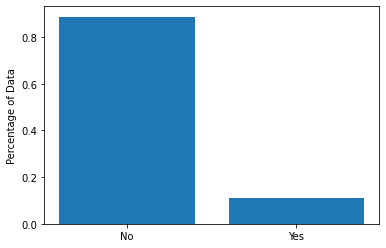

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############
 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the preprocessed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
# Create a decision tree classifier with max depth 3
dtree = DecisionTreeClassifier(max_depth=3)

# Fit the model to the resampled training data
dtree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=3)

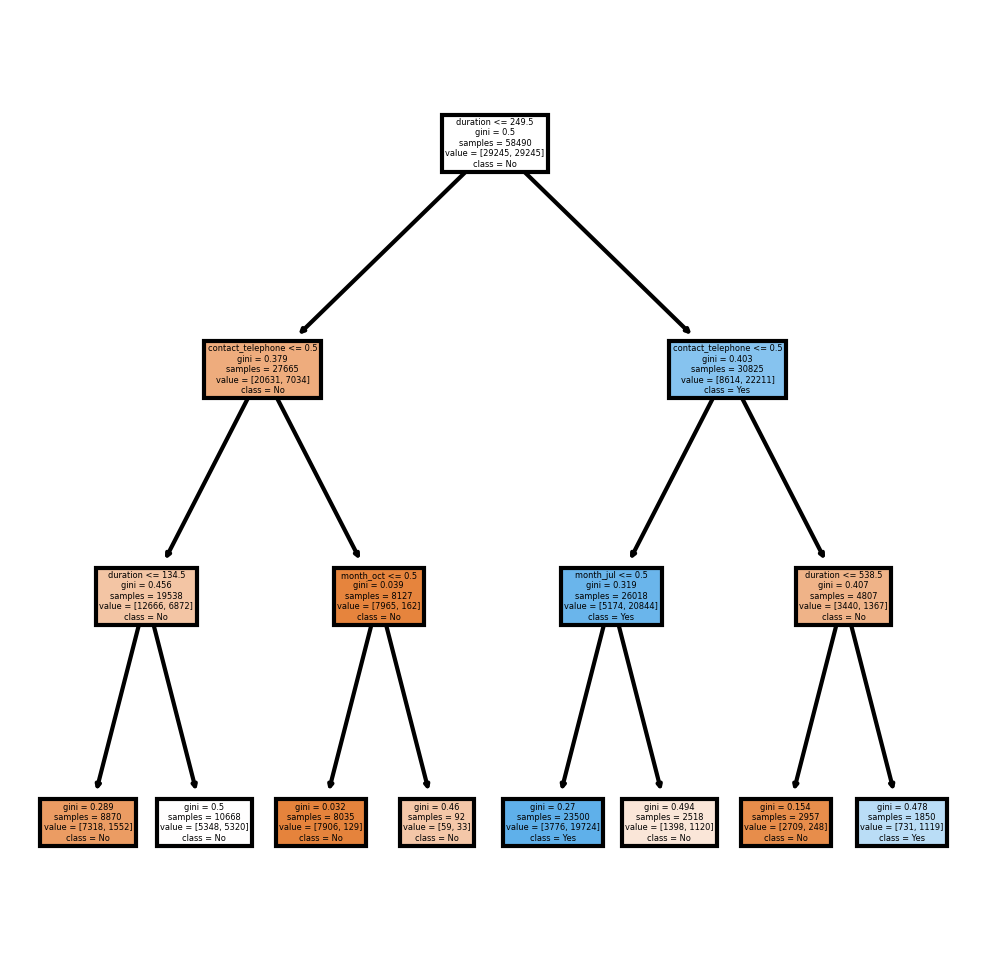

In [13]:
# Visualize the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

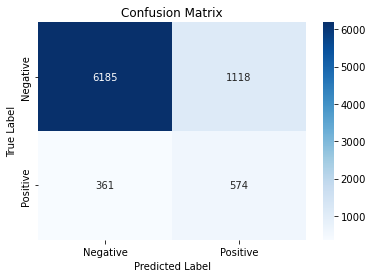

In [14]:
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns

# Predict the class labels for the testing data
y_pred = dtree.predict(X_test)
y_true = y_test

# Compute the confusion matrix
cm_raw = confusion_matrix(y_true, y_pred)

# Define the class labels for the dataset
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

sensitivity_dt= recall_score(y_true, y_pred)

# 3.) Use bagging on your descision tree 

E:\anaconda_download\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Bagging Classifier: 0.7754309298373392


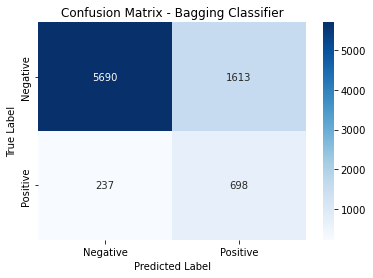

In [15]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_train_resampled, y_train_resampled)

bagging = BaggingClassifier(base_estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)
bagging.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data using the bagging model
y_pred_bagging = bagging.predict(X_test)

# Calculate the accuracy score of the bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy of Bagging Classifier:", accuracy_bagging)

# Calculate the confusion matrix of the bagging model
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
sensitivity_bag= recall_score(y_test, y_pred)

# Visualize the confusion matrix of the bagging model as a heatmap
class_labels = ['Negative', 'Positive']
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Bagging Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [16]:
from sklearn.ensemble import AdaBoostClassifier

E:\anaconda_download\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


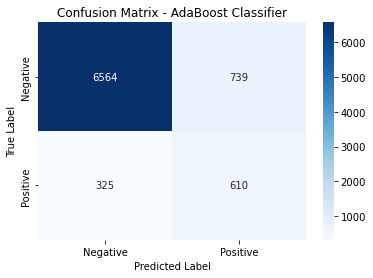

In [17]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data using the AdaBoost model
y_pred_boost = adaboost.predict(X_test)

# Calculate the confusion matrix of the AdaBoost model
cm_boost = confusion_matrix(y_test, y_pred_boost)

# Visualize the confusion matrix of the AdaBoost model as a heatmap
class_labels = ['Negative', 'Positive']
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

sensitivity_boost= recall_score(y_test, y_pred_boost)


# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [18]:
pip install mlens

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from mlens.ensemble import SuperLearner
### SET YOUR BASE LEARNERS
base_learners = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    
]

ensemble = SuperLearner(scorer=accuracy_score, random_state=42, verbose=2)

ensemble.add(base_learners)

ensemble.fit(X_train_resampled, y_train_resampled)

base_predictions_train = ensemble.predict(X_train)
base_predictions_test = ensemble.predict(X_test)


[MLENS] backend: threading



Fitting 1 layers
Processing layer-1             

E:\anaconda_download\lib\site-packages\mlens\parallel\learner.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(xtemp, ytemp)
E:\anaconda_download\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda_download\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda_download\lib\site-packages\mlens\parallel\learner.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

done | 00:00:11
Fit complete                        | 00:00:12

Predicting 1 layers
Processing layer-1             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 1 layers
Processing layer-1             done | 00:00:00
Predict complete                    | 00:00:00


In [20]:
### TRAIN YOUR METALEARNER
meta_learner = LogisticRegression()
meta_learner.fit(base_predictions_train, y_train)


E:\anaconda_download\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
print(meta_learner.coef_)

[[5.06203873 5.06203873 0.7279922  0.36031536 4.85444624]]


In [22]:
### INTERPRET COEFFICIENTS
print(meta_learner.coef_)

[[5.06203873 5.06203873 0.7279922  0.36031536 4.85444624]]


These coefficients indicate the importance of each model in the final learner. For example, in this super learner, the logistic regression provides the highest impact with a coefficient of 5.079.

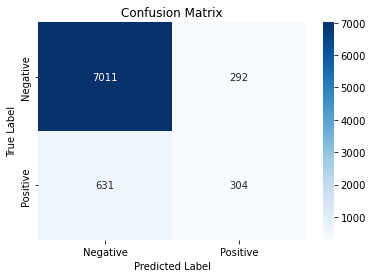

In [23]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = meta_learner.predict(base_predictions_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels for the confusion matrix
class_labels = ['Negative', 'Positive']
sensitivity_sl= recall_score(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save the confusion matrix as a file
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')


# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

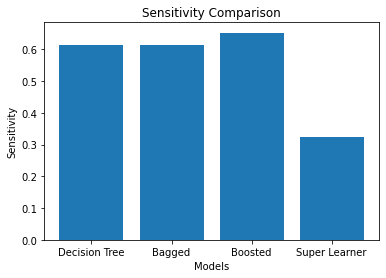

In [24]:
# take previous confusion matrices and make 2 bar chost plotting both
import matplotlib.pyplot as plt

# Define the labels and values for the bar chart
labels = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
values = [sensitivity_dt, sensitivity_bag, sensitivity_boost, sensitivity_sl]

# Create the bar chart
plt.bar(labels, values)

# Add a title and labels to the chart
plt.title('Sensitivity Comparison')
plt.xlabel('Models')
plt.ylabel('Sensitivity')

# Display the chart
plt.show()